# Volume 3: Pandas IV (Time Series).
    Christopher Cook
    Math 406R
    Friday

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Matplotlib customizations.
# plt.style.use("ggplot")                       # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

## Problem 1
The file `DJIA.csv` contains daily closing values of the Dow Jones Industrial Average from 2006–2016.
Read the data into a `Series` or `DataFrame` with a `DatetimeIndex` as the index.
Drop rows with missing values, cast the `"VALUES"` column to floats, then plot the data.

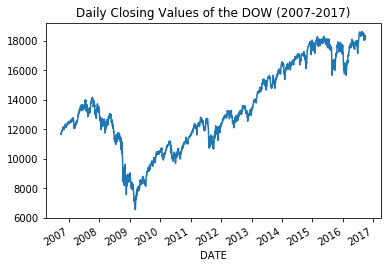

In [3]:
dow = pd.Series(pd.to_numeric(pd.read_csv('DJIA.csv')['VALUE'], errors='coerce').values, index=pd.to_datetime(pd.read_csv('DJIA.csv')['DATE'])).dropna()
dow.plot(kind='line', title='Daily Closing Values of the DOW (2007-2017)')

## Problem 2

The file `paychecks.csv` contains values of an hourly employee's last 93 paychecks.
Paychecks are given on the first and third Fridays of each month, and the employee started working on March 13, 2008.
Read in the data, using `pd.date_range()` to generate the DatetimeIndex.
Plot the data.
(Hint: use the `union()` method of `DatetimeIndex` class.)

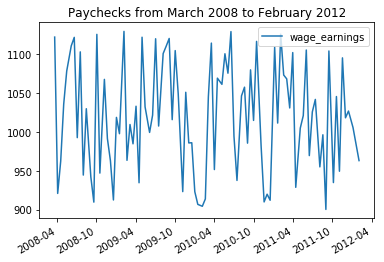

In [4]:
times = pd.date_range(start='3/13/2008 00:00', periods=46, freq='WOM-3FRI').union(pd.date_range(start='3/13/2008 00:00', periods=47, freq='WOM-1FRI'))

payday = pd.DataFrame(pd.read_csv('paychecks.csv', names=['wage_earnings']).values, index=times, columns=['wage_earnings'])
payday.plot(kind='line', title='Paychecks from March 2008 to February 2012')

## Problem 3

The file `finances.csv` contains a list of simulated quarterly earnings and expense totals from a fictional company.
Load the data into a `Series` or `DataFrame` with a `PeriodIndex` with a quarterly frequency.
Assume the fiscal year starts at the beginning of September and that the data begins in September 1978.
Plot the data.

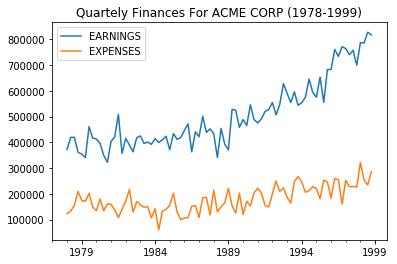

In [5]:
finances = pd.read_csv('finances.csv')
per = pd.period_range(start='1978Q1', freq='Q-AUG', periods= len(finances))
finances.index = per
finances.plot(kind='line', title='Quartely Finances For ACME CORP (1978-1999)')

## Problem 4

The file `website_traffic.csv` contains records for different visits to a fictitious website.
Read in the data, calculate the duration of each visit in seconds and convert the index to a `DatetimeIndex`.
Use downsampling to calculate the average visit duration by minute and the average visit duration by hour.
Plot both results on the same graph.

Text(0,0.5,'Average Minutes Spent')

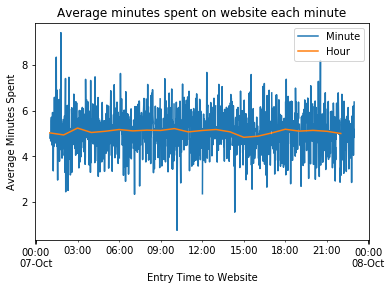

In [57]:
visits = pd.DataFrame(pd.read_csv('website_traffic.csv').values, index = pd.to_datetime(pd.read_csv('website_traffic.csv')['ENTER']), columns=pd.read_csv('website_traffic.csv').columns)

#get duration as a number in terms of minutes
visits['duration'] = pd.to_numeric(pd.to_datetime(visits['LEAVE']) - pd.to_datetime(visits['ENTER']))/60000000000

visits_minute = visits['duration'].resample('T').mean()
visits_hour = visits['duration'].resample('H').mean()
visits_minute.plot(kind='line', title='Average minutes spent on website each minute', label='Minute')
visits_hour.plot(kind='line', title='Average minutes spent on website each minute', label='Hour')
plt.legend(loc='upper right')
plt.xlabel('Entry Time to Website')
plt.ylabel('Average Minutes Spent')

## Problem 5
Compute the following information about the DJIA dataset from Problem 1.
- The single day with the largest gain.
- The single day with the largest loss.
- The month with the largest gain.
- The month with the largest loss.

For the monthly statistics, define the gain (or loss) to be the difference between the DJIA on the last and first days of the month.

In [96]:
dif = dow - dow.shift(1)
print('The day with the biggest gain was:', dif[dif >= dif.max()].index.date[0])
print('The day with the biggest loss was:', dif[dif <= dif.min()].index.date[0])
first_day_of_month = pd.date_range(start='2006-09-27', end='2016-09-26', freq='MS')
last_day_of_month = pd.date_range(start='2006-09-27', end='2016-09-26', freq='M')
mdif = dow.reindex(first_day_of_month.union(last_day_of_month))
mdif = mdif - mdif.shift(1)
mdif = mdif.reindex(last_day_of_month)
print('The month with the biggest gain was:', str(mdif[mdif >= mdif.max()].index.date[0])[:-3])
print('The month with the biggest loss was:', str(mdif[mdif <= mdif.min()].index.date[0])[:-3])


The day with the biggest gain was: 2008-10-13
The day with the biggest loss was: 2008-09-29
The month with the biggest gain was: 2016-03
The month with the biggest loss was: 2008-10


## Problem 6

Plot the following from the DJIA dataset with a window or span of 30, 120, and 365.
- The original data points.
- Rolling average.
- Exponential average.
- Minimum rolling values.
- Maximum rolling values.

Describe how varying the length of the window changes the approximation to the data.

In [72]:
dow

DATE
2006-09-27    11689.24
2006-09-28    11718.45
2006-09-29    11679.07
2006-10-02    11670.35
2006-10-03    11727.34
2006-10-04    11850.61
2006-10-05    11866.69
2006-10-06    11850.21
2006-10-09    11857.81
2006-10-10    11867.17
2006-10-11    11852.13
2006-10-12    11947.70
2006-10-13    11960.51
2006-10-16    11980.60
2006-10-17    11950.02
2006-10-18    11992.68
2006-10-19    12011.73
2006-10-20    12002.37
2006-10-23    12116.91
2006-10-24    12127.88
2006-10-25    12134.68
2006-10-26    12163.66
2006-10-27    12090.26
2006-10-30    12086.50
2006-10-31    12080.73
2006-11-01    12031.02
2006-11-02    12018.54
2006-11-03    11986.04
2006-11-06    12105.55
2006-11-07    12156.77
2006-11-08    12176.54
2006-11-09    12103.30
2006-11-10    12108.43
2006-11-13    12131.88
2006-11-14    12218.01
2006-11-15    12251.71
2006-11-16    12305.82
2006-11-17    12342.56
2006-11-20    12316.54
2006-11-21    12321.59
2006-11-22    12326.95
2006-11-24    12280.17
2006-11-27    12121.71
2006-1